In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests #this is for performing the pairwise tests

In [7]:
df = pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
df.groupby('job').agg({'balance': np.max})


,balance
job,
admin.,64343
blue-collar,66653
entrepreneur,59649
housemaid,45141
management,102127
retired,81204
self-employed,52587
services,57435
student,24025


In [20]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


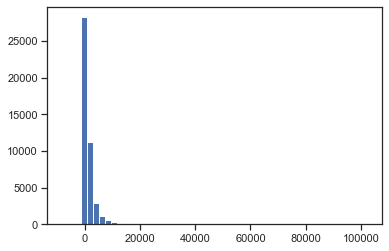

In [34]:
plt.hist(df['balance'], bins = 50);

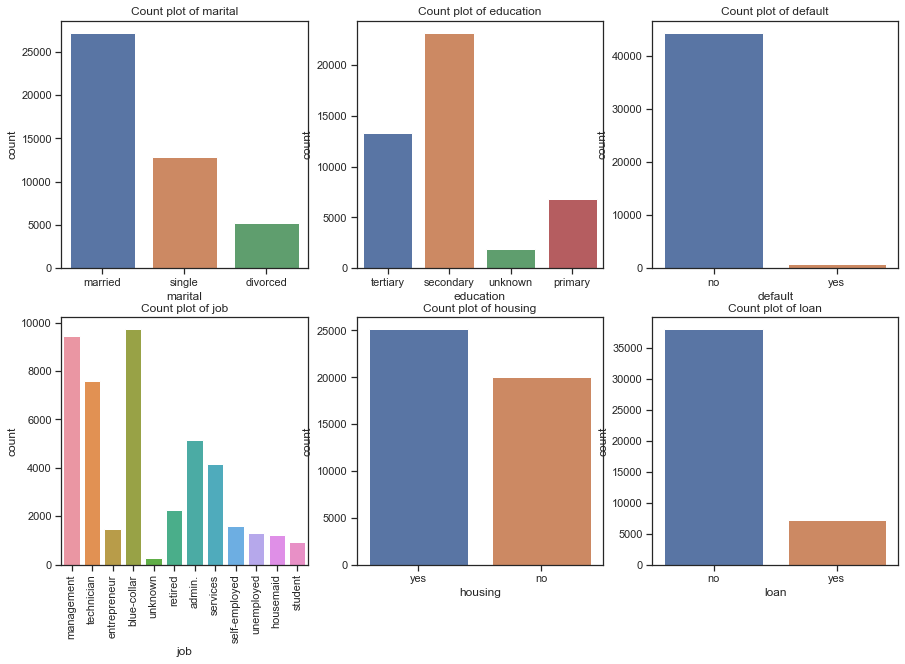

In [55]:
plt.figure(figsize=(15,10))
vars_to_look = ['marital','education','default','job','housing','loan']

for i, var in enumerate(vars_to_look):
    plt.subplot(2,3,i+1)
    
    if var == 'job':
        plt.xticks(rotation = 90)
        
    sns.countplot(df[var])
    
    plt.title("Count plot of " + var)    

In [61]:
stats.ttest_1samp(df['balance'], popmean=1500.122)

Ttest_1sampResult(statistic=-9.626640379922758, pvalue=6.477755602911243e-22)

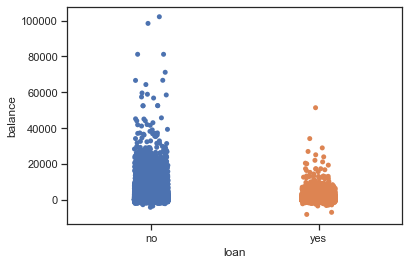

In [62]:
ax = sns.stripplot(x="loan", y="balance", data=df)
plt.ylabel('balance')
plt.show()

In [64]:
df[df['loan']=="yes"]['balance'].describe()

count     7244.000000
mean       774.309912
std       1908.283253
min      -8019.000000
25%          2.000000
50%        258.000000
75%        864.250000
max      51439.000000
Name: balance, dtype: float64

In [66]:
loans_yes = df[df['loan'] =="yes"]['balance']
loans_no = df[df['loan']=="no"]['balance']

statistic, pvalue = stats.ttest_ind(loans_yes,loans_no, equal_var=False)
statistic, pvalue

(-25.18086057755715, 2.7640564777544156e-137)

In [67]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

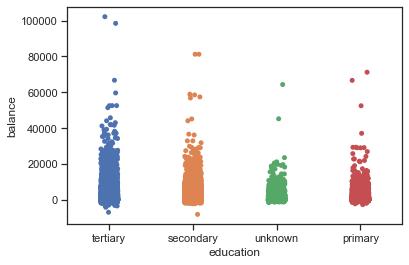

In [68]:
ax = sns.stripplot(x="education", y="balance", data=df)
plt.ylabel('balance')
plt.show()

In [71]:
mod = ols('balance ~ education', data=df).fit()  
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
education,3.220417e+09,3.0,116.682074,2.849538e-75
Residual,4.159034e+11,45207.0,NaN,NaN


In [72]:
df[df['education']=="primary"]['balance'].describe()

count     6851.000000
mean      1250.949934
std       2690.743991
min      -2604.000000
25%         61.000000
50%        403.000000
75%       1390.000000
max      71188.000000
Name: balance, dtype: float64

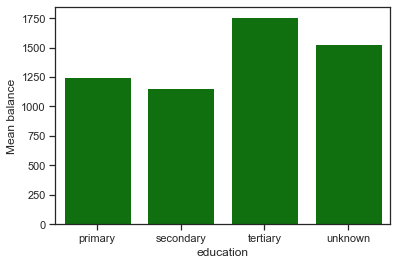

In [75]:
mean_balance_education=df.groupby(['education'])['balance'].mean()

sns.barplot(x=mean_balance_education.index, y=mean_balance_education.values, color="green")
plt.ylabel("Mean balance")
plt.show()

In [81]:
gb = df.groupby(['education'])
group_names = df['education'].unique()

print('\t\t\tstatistic\t\tpvalue')
for i in range(len(group_names)):
  for j in range(i+1, len(group_names)):
    group1 = gb[['balance']].get_group(group_names[i])
    group2 = gb[['balance']].get_group(group_names[j])
    stat, pvalue = stats.ttest_ind(group1, group2, equal_var = False)
    print(group_names[i] + " vs. " + group_names[j] + "\t" + str(stat[0]) + "\t" + str(pvalue[0]))

			statistic		pvalue
tertiary vs. secondary	16.18717929985782	1.4525474790099814e-58
tertiary vs. unknown	2.8825321831203117	0.003976238237673688
tertiary vs. primary	10.906634331433306	1.3023845080432282e-27
secondary vs. unknown	-4.95482328681934	7.83111710943088e-07
secondary vs. primary	-2.6255174227477864	0.0086639693661419
unknown vs. primary	3.445496944400963	0.0005789323657180873


In [82]:
pairwise_results = pairwise_ttests(dv='balance', between = ['education'], padjust='bonf', data=df)
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,education,tertiary,secondary,False,True,16.187,20183.40,two-sided,1.452547e-58,8.715285e-58,bonf,5.742e+54,0.195
1,education,tertiary,unknown,False,True,2.883,2688.20,two-sided,3.976238e-03,2.385743e-02,bonf,1.76,0.062
2,education,tertiary,primary,False,True,10.907,18353.42,two-sided,1.302385e-27,7.814307e-27,bonf,9.088e+23,0.145
3,education,secondary,unknown,False,True,-4.955,2056.38,two-sided,7.831117e-07,4.698670e-06,bonf,5633.685,-0.143
4,education,secondary,primary,False,True,-2.626,10768.24,two-sided,8.663969e-03,5.198382e-02,bonf,0.486,-0.037
5,education,unknown,primary,False,True,3.445,2633.68,two-sided,5.789324e-04,3.473594e-03,bonf,10.941,0.099


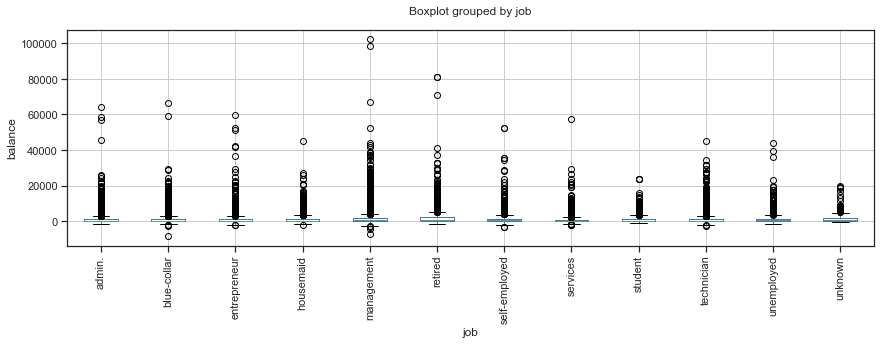

In [84]:
boxplot = df.boxplot(column=['balance'], by="job",figsize=(14,4))
boxplot.axes.set_title("")
plt.ylabel('balance')
plt.xticks(rotation = 90)
plt.show()

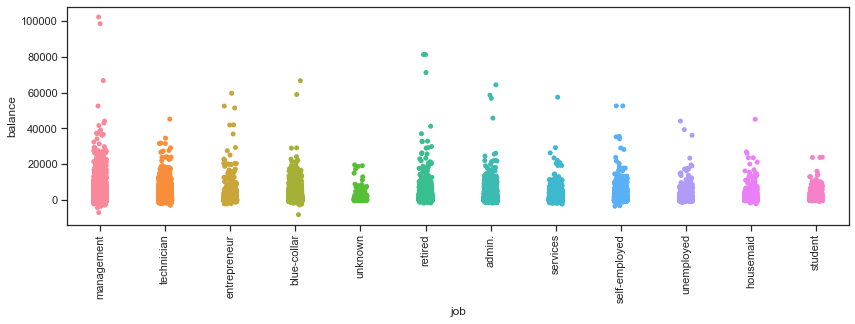

In [86]:
plt.figure(figsize=(14,4))
ax = sns.stripplot(x="job", y="balance", data=df)
plt.ylabel('balance')
plt.xticks(rotation = 90)
plt.show()

In [87]:
mod = ols('balance ~ job', data=df).fit()  
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
job,4.341414e+09,11.0,43.007783,5.709430e-94
Residual,4.147824e+11,45199.0,NaN,NaN


In [88]:
pairwise_job_results = pairwise_ttests(dv='balance', between = ['job'], padjust='bonf', data=df)
pairwise_job_results[pairwise_job_results['A']=='management']

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,job,management,technician,False,True,10.430,16520.44,two-sided,2.169693e-25,1.431997e-23,bonf,5.845e+21,0.154
1,job,management,entrepreneur,False,True,2.112,1902.92,two-sided,3.482514e-02,1.000000e+00,bonf,0.29,0.063
2,job,management,blue-collar,False,True,15.084,15180.50,two-sided,4.851609e-51,3.202062e-49,bonf,1.95e+47,0.219
3,job,management,unknown,False,True,-0.049,316.66,two-sided,9.611682e-01,1.000000e+00,bonf,0.067,-0.002
4,job,management,retired,False,True,-2.197,3131.54,two-sided,2.811739e-02,1.000000e+00,bonf,0.293,-0.056
5,job,management,admin.,False,True,11.667,13855.65,two-sided,2.619442e-31,1.728832e-29,bonf,4.804e+27,0.182
6,job,management,services,False,True,14.826,12787.55,two-sided,2.556646e-49,1.687386e-47,bonf,4.105e+45,0.225
7,job,management,self-employed,False,True,1.148,2184.52,two-sided,2.509488e-01,1.000000e+00,bonf,0.059,0.030
8,job,management,unemployed,False,True,2.531,1875.47,two-sided,1.146511e-02,7.566972e-01,bonf,0.809,0.065
9,job,management,housemaid,False,True,3.973,1818.30,two-sided,7.368307e-05,4.863082e-03,bonf,88.163,0.099
